In [3]:
import mysql.connector
import os


# Source .env file
from dotenv import load_dotenv
load_dotenv()

passwordENV = os.environ.get('LOCAL_DB_PASSWORD')

# Connection configuration
configLocal = {
    'user': 'dan',
    'password': passwordENV,
    'host': 'localhost',
    'port': '3307',
    'database': 'main'
}
# Connect to MariaDB
connectionLocal = mysql.connector.connect(**configLocal)
cursor = connectionLocal.cursor()

In [4]:
# TODO DC: filter out non-english sources for LDA

# qry = "SELECT id, datetime, newsource, headline, pagetitle, pageurl FROM main.headlines WHERE headline LIKE '%Taylor Swift%'"
qry = "SELECT id, datetime, newsource, headline, pagetitle, pageurl FROM main.headlines LIMIT 1000"

data = []
cursor.execute(qry)
for (id, datetime, newssource, headline, pagetitle, pageurl) in cursor:  
  data.append([
    str(headline),
    str(newssource),
    datetime,
  ])
  
cursor.close()

True

In [6]:
from Corpus import Corpus as c

corpus = c.Corpus(data)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [4]:
corpus.initLDA(
  numTopics=10,
  passes=10,
  workers=4,
)

In [11]:
perplexities = []
coherences = []

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/spawn.py", line 120, in spawn_main
Traceback (most recent call last):
      File "<string>", line 1, in <module>
exitcode = _main(fd, parent_sentinel)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/spawn.py", line 120, in spawn_main
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/spawn.py", line 130, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
_pickle.UnpicklingError: pickle data was truncated
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/spawn.py", line 130, in _main
    self = reduction.pickle.load(from_parent)
     

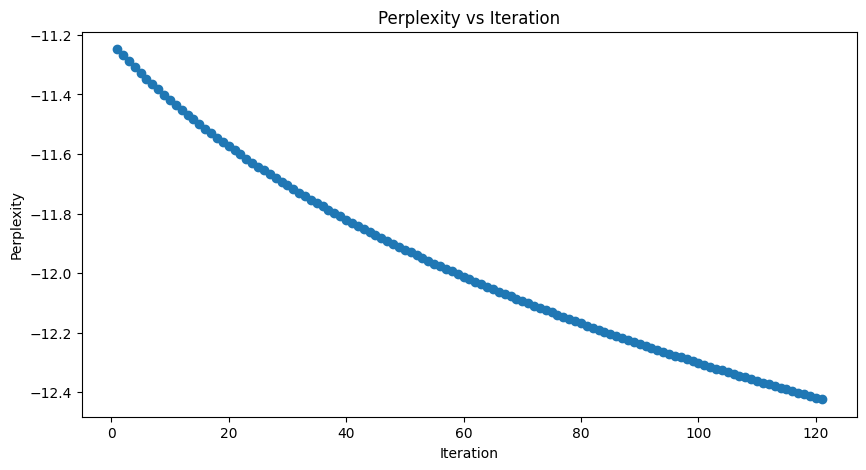

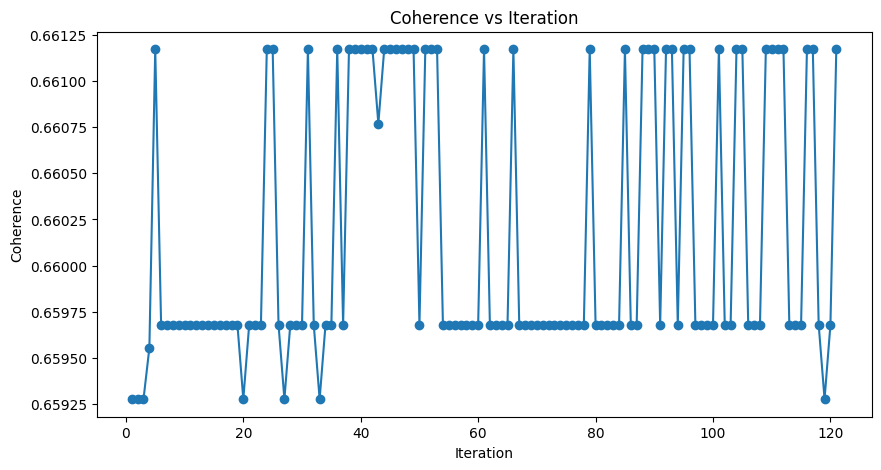

In [16]:
import matplotlib.pyplot as plt

for i in range(0, 50):
  corpus.trainLDA(
    passes=10,
    workers=4,
  )
  [perplexity, coherence] = corpus.assessLDA()
  
  perplexities.append(perplexity)
  coherences.append(coherence)
  
  print(str(i) + ' Perplexity: ' + str(perplexity), end='\r')
  
# Remove previous plots
plt.close('all')

# Plot perplexities
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(perplexities) + 1), perplexities, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Perplexity')
plt.title('Perplexity vs Iteration')
plt.show()

# Plot coherences
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(coherences) + 1), coherences, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Coherence')
plt.title('Coherence vs Iteration')
plt.show()
  
  

In [1]:
# Pickle the corpus
import pickle
with open('../pickle/corpus_1000.pkl', 'wb') as f:
  pickle.dump(corpus, f)

NameError: name 'corpus' is not defined

'negative'

,raw,tokens,topic,date,source
5315,Taylor Swift's new song 'Carolina' based on De...,"[taylor, swift, new, song, carolina, based, de...",2,2022-06-26 12:06:03,foxnews.com
7437,"Meet Gracie Abrams, the pop singer with fans i...","[meet, gracie, abrams, pop, singer, fan, taylo...",2,2022-06-28 18:42:39,independent.co.uk


[{'label': 'neutral', 'score': 0.9998759031295776}]
[{'label': 'neutral', 'score': 0.9998759031295776}]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/dataframe/core.py:4559: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('raw', 'object'))

  warnings.warn(meta_warning(meta))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


[{'label': 'positive', 'score': 0.9838558435440063}][{'label': 'neutral', 'score': 0.999842643737793}]

[{'label': 'neutral', 'score': 0.9998774528503418}]
[{'label': 'neutral', 'score': 0.9998877048492432}]
[{'label': 'neutral', 'score': 0.9998670816421509}]
[{'label': 'neutral', 'score': 0.964509904384613}]
[{'label': 'neutral', 'score': 0.9998852014541626}]
[{'label': 'positive', 'score': 0.8558692932128906}]
[{'label': 'negative', 'score': 0.9200215339660645}]
[{'label': 'positive', 'score': 0.9961418509483337}]
[{'label': 'negative', 'score': 0.9457838535308838}]
[{'label': 'neutral', 'score': 0.9998679161071777}]
[{'label': 'neutral', 'score': 0.7312619090080261}]
[{'label': 'neutral', 'score': 0.9997909665107727}]
[{'label': 'positive', 'score': 0.9956138134002686}]
[{'label': 'neutral', 'score': 0.9998753070831299}]
[{'label': 'neutral', 'score': 0.9998877048492432}]
[{'label': 'neutral', 'score': 0.8034765720367432}]
[{'label': 'neutral', 'score': 0.9997370839118958}]
[{'label

,raw,tokens,topic,date,source,s
6,Taylor Swift responds to critics after jet top...,"[taylor, swift, responds, critic, jet, top, wo...",None,2022-07-31 19:19:29,foxnews.com,negative
7,Taylor Swift's rep calls private-jet report 'b...,"[taylor, swift, rep, call, privatejet, report,...",None,2022-08-02 07:45:10,inquirer.com,negative
8,Representatives for US singer Taylor Swift hit...,"[representative, u, singer, taylor, swift, hit...",None,2022-08-03 10:57:01,irishnews.com,negative
9,"Taylor Swift, Drake and Kylie Jenner have priv...","[taylor, swift, drake, kylie, jenner, private,...",None,2022-08-08 16:59:16,nbcnews.com,negative
67,Taylor Swift fans are fuming as singer uses th...,"[taylor, swift, fan, fuming, singer, us, word,...",None,2022-10-27 13:31:12,joe.co.uk,negative
...,...,...,...,...,...,...
628,F1 commentators drop Taylor Swift references d...,"[f1, commentator, drop, taylor, swift, referen...",None,2023-05-03 04:07:28,indy100.com,negative
631,F1 commentators drop Taylor Swift references d...,"[f1, commentator, drop, taylor, swift, referen...",None,2023-05-03 14:50:55,indy100.com,negative
641,F1 fans devastated for Alonso as rumoured girl...,"[f1, fan, devastated, alonso, rumoured, girlfr...",None,2023-05-04 12:55:04,thesun.ie,negative
709,Taylor Swift's Nashville show delayed for four...,"[taylor, swift, nashville, show, delayed, four...",None,2023-05-08 11:40:32,metro.co.uk,negative


<AxesSubplot: xlabel='source'>

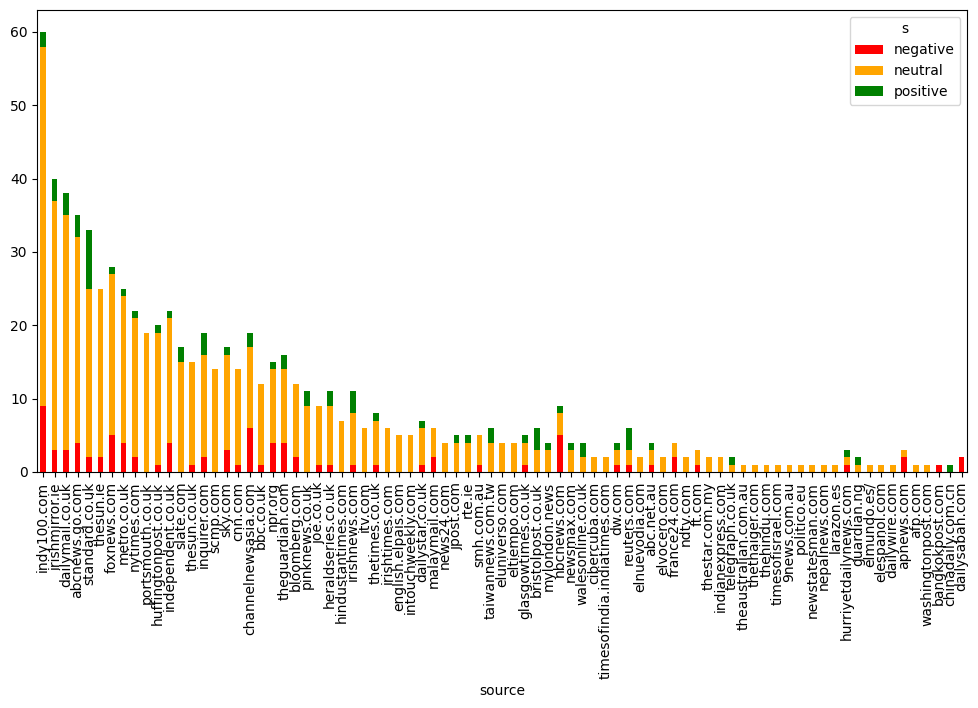